In [27]:
pip install selenium


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd

In [2]:
PATH = '/Users/Asus/Downloads/chromedriver'
driver = webdriver.Chrome(PATH)
driver.quit()

In [3]:
import numpy as np
import pandas as pd
import bs4
import lxml.etree as xml
import time

In [6]:
driver = webdriver.Chrome(PATH)
driver.get('https://www.google.com/')
driver.quit()

In [5]:
url = 'https://www.nepremicnine.net/'

In [5]:
url2 = 'https://www.nepremicnine.net/oglasi-prodaja/ljubljana-mesto/stanovanje/'

In [56]:
driver = webdriver.Chrome(PATH)
driver.get(url2)

In [6]:
driver = webdriver.Chrome(PATH)
driver.get(url2)
code = driver.page_source
time.sleep(5)
driver.quit()

In [8]:
driver = webdriver.Chrome(PATH)
driver.get(url2)
webpage = bs4.BeautifulSoup(code, "lxml")

<html itemscope="" itemtype="http://schema.org/WebSite" lang="sl" style="display: block;" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="sl" http-equiv="content-language"/>
  <meta content="D9C9544A6631C60218BF47FD618F42E5" name="msvalidate.01"/>
  <meta content="IE=EDGE" http-equiv="X-UA-Compatible"/>
  <meta content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" name="SKYPE_TOOLBAR"/>
  <meta content="telephone=no" name="format-detection"/>
  <title>
   Stanovanje Prodaja Ljubljana mesto | NEPREMICNINE.net
  </title>
  <meta content="ljubljana-mesto, stanovanje, prodaja" name="Keywords"/>
  <meta content="Rezultati iskanja nepremičnin: Stanovanje Prodaja Ljubljana mesto na Nepremicnine.net" name="Description"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="https://nepremicnine.click" rel="dns-prefetch"/>
  <link href="https://nepremicnine.click" rel="preconnect"/>
  <link href="https://ww
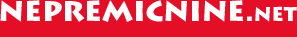

In [14]:
print(webpage.prettify())

In [16]:
for ad in webpage.find_all('div', itemprop='item'): 
    print(ad.prettify())
    

<div itemprop="item" itemscope="" itemtype="http://schema.org/Offer">
 <meta content="oglasi prodaja &gt; ljubljana mesto &gt; stanovanje" itemprop="category"/>
 <meta content="https://www.nepremicnine.net/oglasi-prodaja/bezigrajski-dvor-plava-laguna-stanovanje_6390803/" itemprop="mainEntityOfPage"/>
 <h2 data-href="/oglasi-prodaja/bezigrajski-dvor-plava-laguna-stanovanje_6390803/" itemprop="name">
  <a href="/oglasi-prodaja/bezigrajski-dvor-plava-laguna-stanovanje_6390803/" itemprop="url" title="6390803">
   <span class="label ne_spreglejte">
    Ne spreglejte
   </span>
   <span class="invisible">
    -
   </span>
   <span class="title">
    BEŽIGRAJSKI DVOR, PLAVA LAGUNA
   </span>
  </a>
 </h2>
 <a class="slika" href="/oglasi-prodaja/bezigrajski-dvor-plava-laguna-stanovanje_6390803/">
  <img class="lazyloaded" data-src="https://img.nepremicnine.link/sIonep_oglasi2/8243959.jpg" itemprop="image" src="https://img.nepremicnine.link/sIonep_oglasi2/8243959.jpg"/>
 </a>
 <a class="ikona-s

In [9]:
for ad in webpage.find_all('div', itemprop='item'): 
    print(ad.find('span', class_='title').text)
    print(ad.find('span', class_='vrsta').text)
    print(ad.find('span', class_='atribut').text)
    print(ad.find('span', class_='atribut leto').text)
    print('Opis: ' + ad.find('div', class_='kratek').text)
    print('velikost: ' + ad.find('span', class_='velikost').text)
    print('Prodajalec : ' + ad.find('div', class_='prodajalec_o')['title'])
    print('cena: ' + ad.find('span', class_='cena').text)
    print('Link : ' + ad.find('a', class_='slika')['href'])
    print('St.Oglasa : ' + ad.find('a', class_='ikona-sh3 utility')['data-id'])
    #print(ad.find('a', class_='').text)
    
    print('-----------------------------------------------')
    

BEŽIGRAJSKI DVOR, PLAVA LAGUNA
Stanovanje
Nadstropje: 2/10, 
Leto: 1974
Opis: 119 m2, 3-sobno, zgrajeno l. 1974, 2/10 nad., komfortno stanovanje v Plavi laguni, lastno parkirišče, odlična lokacija, ...
velikost: 119,00 m2
Prodajalec : QUDOS, center nepremičnin d.o.o.
cena: 323.000,00 €
Link : /oglasi-prodaja/bezigrajski-dvor-plava-laguna-stanovanje_6390803/
St.Oglasa : 6390803
-----------------------------------------------
BS 3
Stanovanje
Nadstropje: 6/18, 
Leto: 1981
Opis: 73 m2, 2,5-sobno, zgrajeno l. 1981, adaptirano l. 2015, 6/18 nad., Super lokacija stanovanja v naselju BS3 z odličnim po...
velikost: 73,00 m2
Prodajalec : Studio 68 d.o.o.
cena: 210.000,00 €
Link : /oglasi-prodaja/bs-3-stanovanje_6389036/
St.Oglasa : 6389036
-----------------------------------------------
DRAVLJE
Stanovanje
Nadstropje: M/2, 
Leto: 2015
Opis: 75,72 m2, 3-sobno, "penthouse", zgrajeno l. 2015, M/2 nad., izredno moderno in atraktivno stanovanje, dizajner...
velikost: 75,72 m2
Prodajalec : Harmonija ne

In [10]:
di1 = {'Ad_Id':[], 
      'Title':[],
      'Type':[],
      'Year':[],
      'Short_Desc':[],
      'Link':[],
    'Seller':[],
      'Size':[],
      'Price':[]
       
      }
dataset1 = pd.DataFrame(di1)

In [ ]:
dataset1 = dataset1.iloc[0:0]

In [125]:
dataset1
count = 0

In [11]:
count = 0
dataset1 = dataset1.iloc[0:0]
for ad in webpage.find_all('div', itemprop='item'): 
    list1 = []
    list1.append(int(ad.find('a', class_='ikona-sh3 utility')['data-id']))
    list1.append(ad.find('span', class_='title').text)
    list1.append(ad.find('span', class_='vrsta').text)
    year_raw = ad.find('span', class_='atribut leto').text
    year = int(year_raw.split(':')[-1])
    list1.append(year)
    list1.append(ad.find('div', class_='kratek').text)
    list1.append(ad.find('a', class_='slika')['href'])
    list1.append(ad.find('div', class_='prodajalec_o')['title'])
    size_raw = ad.find('span', class_='velikost').text
    size = float((size_raw.split(' ')[0]).replace(',','.'))
    list1.append(size)
    
    price_raw = ad.find('span', class_='cena').text
    price = float(((price_raw.split(' ')[0]).replace('.', '')).replace(',', '.')) # remove dot separation and y decimal sep.
    list1.append(price)
    
    price_old = np.nan
    price_old_raw = ad.find('span', class_='cena').text
    price_old = float(((price_raw.split(' ')[0]).replace('.', '')).replace(',', '.')) # remove dot separation and y decimal sep.
    list1.append(price)
    
    count += 1
       
    df1 = pd.DataFrame(list1)
    df_len = len(dataset1)
    dataset1.loc[df_len] = list1
    print(list1)
    print('-' + str(count) +'-'+    str(list1[0]))

ValueError: cannot set a row with mismatched columns

In [87]:
dataset1

,Ad_Id,Title,Type,Year,Short_Desc,Link,Seller,Size,Price
0,6390803.0,"BEŽIGRAJSKI DVOR, PLAVA LAGUNA",Stanovanje,1974,"119 m2, 3-sobno, zgrajeno l. 1974, 2/10 nad., ...",/oglasi-prodaja/bezigrajski-dvor-plava-laguna-...,"QUDOS, center nepremičnin d.o.o.",119.00,323000.00
1,6389036.0,BS 3,Stanovanje,1981,"73 m2, 2,5-sobno, zgrajeno l. 1981, adaptirano...",/oglasi-prodaja/bs-3-stanovanje_6389036/,Studio 68 d.o.o.,73.00,210000.00
2,6384315.0,DRAVLJE,Stanovanje,2015,"75,72 m2, 3-sobno, ""penthouse"", zgrajeno l. 20...",/oglasi-prodaja/dravlje-stanovanje_6384315/,Harmonija nepremičnine d.o.o.,75.72,322000.00
3,6375065.0,"KODELJEVO, POVŠETOVA",Stanovanje,2005,"43,8 m2, 1,5-sobno, zgrajeno l. 2005, adaptira...",/oglasi-prodaja/kodeljevo-povsetova-stanovanje...,Posredovanje z nepremičninami in turizem Nigor...,43.80,170000.00
4,6388664.0,LJ. BEŽIGRAD,Stanovanje,2001,"44,7 m2, garsonjera, zgrajena l. 2001, 1. nad....",/oglasi-prodaja/lj-bezigrad-stanovanje_6388664/,MKA nepremičnine d.o.o.,44.70,144000.00
5,6389328.0,LJ. BEŽIGRAD,Stanovanje,1962,"61,6 m2, 3-sobno, zgrajeno l. 1962, 1. nad., B...",/oglasi-prodaja/lj-bezigrad-stanovanje_6389328/,"STAN nepremičnine d.o.o., Ljubljana",61.60,195000.00
6,6369398.0,LJ. BEŽIGRAD,Stanovanje,1963,"72,6 m2, 3-sobno, zgrajeno l. 1963, adaptirano...",/oglasi-prodaja/lj-bezigrad-stanovanje_6369398/,FINEP Drago Kosec s.p.,72.60,219500.00
7,6368284.0,LJ. BEŽIGRAD,Stanovanje,2021,"140,48 m2, 4-sobno, zgrajeno l. 2021, 1. nad.,...",/oglasi-prodaja/lj-bezigrad-stanovanje_6368284/,ABC nepremičnine d.o.o.,140.48,532114.80
8,6359990.0,LJ. BEŽIGRAD,Stanovanje,2012,"188,9 m2, 5 in večsobno, zgrajeno l. 2012, pro...",/oglasi-prodaja/lj-bezigrad-stanovanje_6359990/,ABC nepremičnine d.o.o.,188.90,690000.00
9,6388681.0,LJ. CENTER,Stanovanje,1503,"59,4 m2, 1,5-sobno, zgrajeno l. 1503, adaptira...",/oglasi-prodaja/lj-center-stanovanje_6388681/,Mreža nepremičnin d.o.o.,59.40,199000.00


In [88]:
### not in use.
### attempt to convert string with 000.000,00 to float, done more easily below (after it already worked).
price_raw = (ad.find('span', class_='cena').text).split(' ')[0]
price_raw1 = ''
for i in range(0,len(price_raw.split('.'))):
    price_raw1 = price_raw1 + price_raw.split('.')[i]
    print(price_raw1)
price = (int( price_raw1.split(',')[0] + price_raw.split(',')[1]))/100
price

374
374578,00


374578.0

In [89]:
int(ad.find('a', class_='ikona-sh3 utility')['data-id'])

6384147

In [71]:
ad = webpage.find_all('div', itemprop='item')

In [85]:
price_raw = ad.find('span', class_='cena').text
print(price_raw)
price = float(((price_raw.split(' ')[0]).replace('.', '')).replace(',', '.')) # remove dot separation, 
price

374.578,00 €


374578.0

In [73]:
price_raw = ad.find('span', class_='cena').text
price_raw

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [6]:
#ad.find('span', class_='cena').text

price_old = np.nan
price_old

nan

In [18]:
list2 = []
driver = webdriver.Chrome(PATH)
driver.get(url2)
code = driver.page_source
webpage = bs4.BeautifulSoup(code, "lxml")
for ad in webpage.find_all('div', itemprop='item'):
    price_old = np.nan
    price_old_raw = ad.find('span', class_='cena-old').text
    price_old = float(((price_old_raw.split(' ')[0]).replace('.', '')).replace(',', '.')) # remove dot separation and y decimal sep.
    list2.append(price_old)
list2

AttributeError: 'NoneType' object has no attribute 'text'